# Clone CodeXGLUE Repo

In [2]:
!git clone https://github.com/microsoft/CodeXGLUE.git

Cloning into 'CodeXGLUE'...
remote: Enumerating objects: 3373, done.
remote: Counting objects: 100% (3372/3372), done.
remote: Compressing objects: 100% (1534/1534), done.
remote: Total 3373 (delta 1748), reused 3326 (delta 1733), pack-reused 1 (from 1)
Receiving objects: 100% (3373/3373), 213.15 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (1748/1748), done.
Updating files: 100% (400/400), done.


# Downloading and Preprocessing Dataset

In [14]:
%cd /content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150
!bash /content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/download_and_extract.sh
!python preprocess.py --base_dir=py150_files --output_dir=token_completion

/content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150
train: 0 are done
train: 10000 are done
train: 20000 are done
train: 30000 are done
train: 40000 are done
train: 50000 are done
train: 60000 are done
train: 70000 are done
train: 80000 are done
train: 90000 are done
dev: 0 are done
test: 0 are done
test: 10000 are done
test: 20000 are done
test: 30000 are done
test: 40000 are done


# Cloning GPT-NeoX Repo

In [18]:
%cd /content/
!git clone https://github.com/EleutherAI/gpt-neox.git

/content
Cloning into 'gpt-neox'...
remote: Enumerating objects: 19496, done.
remote: Counting objects: 100% (1699/1699), done.
remote: Compressing objects: 100% (822/822), done.
remote: Total 19496 (delta 1252), reused 1206 (delta 869), pack-reused 17797 (from 1)
Receiving objects: 100% (19496/19496), 113.65 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (14109/14109), done.


In [19]:
!git clone https://github.com/markNZed/GPT-NeoX-Colab.git

Cloning into 'GPT-NeoX-Colab'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 331 (delta 69), reused 63 (delta 24), pack-reused 201 (from 1)
Receiving objects: 100% (331/331), 11.70 MiB | 11.51 MiB/s, done.
Resolving deltas: 100% (184/184), done.


# Install Dependencies

In [32]:
%%time
%cd /content/gpt-neox
# Could not redirect to /dev/null in the standard Colab notebook (maybe no output for a particular time?)
# Currently deepspeed from GTP-NeoX is not compatible with logging in torch >= 2.4
!pip install torch==2.3 torchaudio==2.3.0 torchvision==0.18.0 transformers==4.41.0 sentence-transformers==2.2.2
!pip install -r ./requirements/requirements.txt

/content/gpt-neox
  Using cached transformers-4.41.0-py3-none-any.whl.metadata (43 kB)
Using cached transformers-4.41.0-py3-none-any.whl (9.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.0
    Uninstalling transformers-4.38.0:
      Successfully uninstalled transformers-4.38.0
  Using cached deepspeed-0.12.4+02e2ebf-py3-none-any.whl
  Using cached lm_dataformat-0.0.20-py3-none-any.whl
  Using cached transformers-4.38.0-py3-none-any.whl.metadata (131 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.38.0-py3-none-any.whl (8.5 MB)
Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014

# Preparing Custom Dataset


In [22]:
%cd /content/gpt-neox
!!mkdir -p data

/content/gpt-neox


[]

In [23]:
import json

# Generate a list of dictionaries
lines = []
with open("/content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/py150_files/token_completion/train.txt", encoding="utf8") as f:
    for line in f.read().splitlines():
        if line:
            lines.append({"text": line})

# Convert to a list of JSON strings
json_lines = [json.dumps(l) for l in lines]

# Join lines and save to .jsonl file
json_data = '\n'.join(json_lines)
with open('/content/gpt-neox/data/py95K_train.jsonl', 'w') as f:
    f.write(json_data)

# Using Byte-Pair Encoding Tokenizer

In [50]:
%cd data
!wget https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-vocab.json
!wget https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-merges.txt

/content/gpt-neox/processed_data
--2024-11-01 23:24:10--  https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-vocab.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.185.181, 52.216.48.152, 16.15.184.191, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.185.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving to: ‘gpt2-vocab.json’

gpt2-vocab.json     100%[===================>]   1018K   896KB/s    in 1.1s    

2024-11-01 23:24:12 (896 KB/s) - ‘gpt2-vocab.json’ saved [1042301/1042301]

--2024-11-01 23:24:12--  https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-merges.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.185.181, 52.216.48.152, 16.15.184.191, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.185.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [text/plain]
Saving to: ‘gpt2-merges.txt’

gpt2-merges.txt     100%[=

In [27]:
%%time
%cd /content/gpt-neox
!mkdir -p processed_data
!python tools/datasets/preprocess_data.py \
    --input ./data/py95K_train.jsonl \
    --vocab ./data/gpt2-vocab.json \
    --merge-file ./data/gpt2-merges.txt \
    --output-prefix ./processed_data/py150 \
    --tokenizer-type GPT2BPETokenizer \
    --dataset-impl mmap \
    --append-eod

/content/gpt-neox
[2024-11-01 22:23:21,548] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
> building GPT2BPETokenizer tokenizer ...
 > padded vocab (size: 50257) with 47 dummy tokens (new size: 50304)
Vocab size: 50257
Output prefix: ./processed_data/py150
> building GPT2BPETokenizer tokenizer ...
 > padded vocab (size: 50257) with 47 dummy tokens (new size: 50304)
Processed 95000 documents (119.29 docs/s, 0.53 MB/s).: : 95000it [13:16, 119.29it/s]
CPU times: user 5.05 s, sys: 544 ms, total: 5.6 s
Wall time: 13min 22s


# Training

In [28]:
%load_ext tensorboard

In [36]:
%cd /content/gpt-neox
!python ./deepy.py train.py --conf_dir /content/GPT-NeoX-Colab/configs CC19M.yml cc_setup.yml

/content/gpt-neox
[2024-11-01 22:57:54,155] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
NeoXArgs.from_ymls() ['configs/19M.yml', 'configs/local_setup.yml']
INFO:root:NeoXArgs.calculate_derived() Total number of GPUs determined to be: 1
-------------------- arguments --------------------
  attention_config ................ ['global', 'global', 'global', 'global', 'global', 'global']updated
  batch_size ...................... 4...........................updated
  checkpoint_activations .......... True........................updated
  checkpoint_factor ............... 1000........................updated
  config_files .................... {'19M.yml': '{\n  "pipe_parallel_size": 0,\n  "model_parallel_size": 1,\n\n  # model settings\n  "num_layers": 6,\n  "hidden_size": 512,\n  "num_attention_heads": 8,\n  "seq_length": 2048,\n  "max_position_embeddings": 2048,\n  "pos_emb": "rotary",\n  "no_weight_tying": true,\n  "gpt_j_residual": false,\n

# Inference

In [37]:
!python ./deepy.py generate.py -d /content/GPT-NeoX-Colab/configs CC19M.yml cc_setup.yml text_generation.yml

[2024-11-01 23:03:32,056] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
NeoXArgs.from_ymls() ['configs/19M.yml', 'configs/local_setup.yml', 'configs/text_generation.yml']
INFO:root:NeoXArgs.calculate_derived() Total number of GPUs determined to be: 1
-------------------- arguments --------------------
  attention_config ................ ['global', 'global', 'global', 'global', 'global', 'global']updated
  batch_size ...................... 4...........................updated
  checkpoint_activations .......... True........................updated
  checkpoint_factor ............... 1000........................updated
  config_files .................... {'19M.yml': '{\n  "pipe_parallel_size": 0,\n  "model_parallel_size": 1,\n\n  # model settings\n  "num_layers": 6,\n  "hidden_size": 512,\n  "num_attention_heads": 8,\n  "seq_length": 2048,\n  "max_position_embeddings": 2048,\n  "pos_emb": "rotary",\n  "no_weight_tying": true,\n  "gpt_j_residu

Available scalar keys: ['timers/forward', 'timers/backward', 'timers/backward-backward', 'timers/backward-allreduce', 'timers/optimizer', 'timers/batch generator', 'train/learning_rate', 'train/lm_loss', 'train/loss_scale', 'runtime/samples_per_sec', 'runtime/iteration_time', 'runtime/flops_per_sec_per_gpu', 'validation/lm_loss', 'validation/lm_loss_ppl', 'test/lm_loss', 'test/lm_loss_ppl']


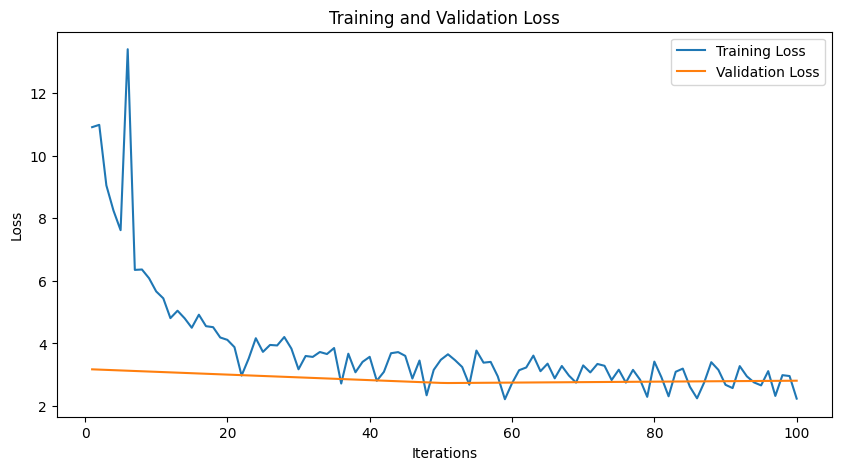

In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import os
import numpy as np
# Path to the latest log file
log_dir = "tensorboard"
log_files = [os.path.join(log_dir, d) for d in os.listdir(log_dir)]
latest_log_dir = max(log_files, key=os.path.getmtime)

# Initialize EventAccumulator to load scalar data
ea = event_accumulator.EventAccumulator(latest_log_dir)
ea.Reload()  # Load all logs

# List all scalar keys available in the logs
scalar_keys = ea.Tags()['scalars']
print("Available scalar keys:", scalar_keys)

# Extract training and validation losses
train_loss = ea.Scalars('train/lm_loss')  # Adjust for actual name if necessary
val_loss = ea.Scalars('validation/lm_loss')  # Adjust for actual name if necessary

# Convert to lists for plotting
train_loss_values = [x.value for x in train_loss]
val_loss_values = [x.value for x in val_loss]

# Find the lengths of both arrays
len_train = len(train_loss_values)
len_val = len(val_loss_values)

iterations = None
# Interpolate the shorter array
if len_train != len_val:
    if len_train > len_val:
        # Interpolate validation loss to match the training loss length
        iterations = np.linspace(1, len_train, len_train)
        val_iterations = np.linspace(1, len_train, len_val)
        val_loss_values = np.interp(iterations, val_iterations, val_loss_values)
    else:
        # Interpolate training loss to match the validation loss length
        iterations = np.linspace(1, len_val, len_val)
        train_iterations = np.linspace(1, len_val, len_train)
        train_loss_values = np.interp(iterations, train_iterations, train_loss_values)
else:
    iterations = range(1, len_train + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_loss_values, label='Training Loss')
plt.plot(iterations, val_loss_values, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


# HuggingFace Inference

# Convert Our Model to HuggingFace Format

In [38]:
import os

# Define the path to the checkpoints directory
checkpoints_dir = "/content/gpt-neox/checkpoints"

# Read the 'latest' file to get the latest checkpoint name
with open(os.path.join(checkpoints_dir, "latest"), "r") as f:
    latest_checkpoint_name = f.read().strip()

# Construct the full path to the latest checkpoint directory
latest_checkpoint_path = os.path.join(checkpoints_dir, latest_checkpoint_name)
print("Path to the latest checkpoint:", latest_checkpoint_path)

Path to the latest checkpoint: /content/gpt-neox/checkpoints/global_step100


In [55]:
!python ./tools/ckpts/convert_neox_to_hf.py --input_dir {latest_checkpoint_path} --config_file /content/GPT-NeoX-Colab/configs/CC19M.yml --output_dir hf_model/save/location --precision auto --architecture neox

[2024-11-01 23:27:25,261] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
Detected 'pipe-parallel-size' of 0, assuming model is saved as Sequential...
> building GPT2BPETokenizer tokenizer ...
 > padded vocab (size: 50257) with 47 dummy tokens (new size: 50304)
Auto-detecting precision to save model into...
Saving weights in fp16 precision...
['sequential.0.word_embeddings.weight', 'sequential.2.input_layernorm.weight', 'sequential.2.input_layernorm.bias', 'sequential.2.attention.query_key_value.weight', 'sequential.2.attention.query_key_value.bias', 'sequential.2.attention.dense.weight', 'sequential.2.attention.dense.bias', 'sequential.2.post_attention_layernorm.weight', 'sequential.2.post_attention_layernorm.bias', 'sequential.2.mlp.linear1.weight', 'sequential.2.mlp.linear1.bias', 'sequential.2.mlp.linear2.weight', 'sequential.2.mlp.linear2.bias', 'sequential.3.input_layernorm.weight', 'sequential.3.input_layernorm.bias', 'sequential.3.a

# Code Completion

In [61]:
from transformers import GPTNeoXForCausalLM
import torch

# Move to model directory
%cd /content/gpt-neox

# Assuming CharLevelTokenizer is properly imported and instantiated
from megatron.tokenizer.tokenizer import _GPT2BPETokenizer
tokenizer = _GPT2BPETokenizer(vocab_file="data/gpt2-vocab.json", merge_file="data/gpt2-merges.txt")

# Load your model
model_path = "/content/gpt-neox/hf_model/save/location"
model = GPTNeoXForCausalLM.from_pretrained(model_path)

# Define a simple char-level tokenizer if not provided
def char_level_tokenize(text):
    return tokenizer.tokenize(text)

def char_level_detokenize(tokens):
    return tokenizer.detokenize(tokens)

# Set the model to evaluation mode
model.eval()

# Prompt the user for input
#input_text = input("Enter your prompt: ")
input_text = "<s> import os"

# Tokenize and prepare input
input_ids = torch.tensor([char_level_tokenize(input_text)], dtype=torch.long)
attention_mask = torch.ones_like(input_ids)  # Create an attention mask for non-padded input

# Generate text with specified pad_token_id and attention_mask
with torch.no_grad():
    output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=200,          # Adjust this for desired output length
        temperature=0.7,        # Controls creativity
        top_k=50,               # Controls diversity
        top_p=0.9,              # Nucleus sampling
        num_return_sequences=1, # Number of sequences to return
        pad_token_id=model.config.eos_token_id,  # Set pad_token_id explicitly
        do_sample=True           # Enable sampling mode to use temperature and top_p
    )

# Decode and print the generated text
generated_text = char_level_detokenize(output[0].tolist())
print("Generated text:", generated_text)

/content/gpt-neox
Generated text: <s> import os._id ( ), ) ) ), (, )., <EOL> self. data. _ = True, <EOL>. set_d ( self ) ) ) <EOL> self. __ ( ) <EOL> self. _1 = _ [ '<STR_LIT>' ) <EOL> ) <EOL> self. _1 ( "<STR_LIT:1>' ) <EOL> def set_config ( ) <EOL> class_name ( self ) ) <EOL> self. _name, '<STR_LIT>', <EOL> return [ '<STR_LIT>', '<STR_LIT>', <EOL> return ( self. assert_name, self, '<STR_LIT:1>', <EOL> ) <EOL> import os. _1
